# Transfer Learning

We've already looked an example of transfer learning when working with application in Natural Language Processing. For sentiment classification, we used various feature representations including using GloVe representations as the chosen word embedding. That was one example of transfer learning where the approach we used was a feature representation transfer.

In this exercise we will apply transfer learning to computer vision where we will incorporate both parameter transfer as well as feature representation transfer. You can take a look at the available pre-trained models in keras on the [applications page](https://keras.io/applications) in the documentation. In practice, we rarely build a model from scratch and instead use transfer learning to gain the benefit of state of the art models.

For thie exercise, we will use the [CIFAR10 dataset](https://keras.io/datasets/#cifar10-small-image-classification).

In [1]:
! pip install tensorflow==2.0

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Model


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_classes=10

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3755763710098626315, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11062436089583643920
 physical_device_desc: "device: XLA_CPU device"]

In [4]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
y_train.min(), y_train.max()

(0, 9)

In [6]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train.shape, y_test.shape, y_train.min(), y_train.max()

((50000, 10), (10000, 10), 0.0, 1.0)

First, we will use a VGG-16 model to extract features from a sample. The VGG-16 model without the fully connected layers is equivalent to just the pretrained convolutional layers. By passing data through the model we are able to extract features based on the knowledge from the pretrained imagenet dataset.

In [0]:
# Load a VGG16 model with imagenet weights, without the fully connected layers, and with the adjusted input shape for our data
# Save the model as vgg_model

# YOUR CODE HERE
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))



In [0]:
assert vgg_model

In [10]:
example = x_train[10]
example.shape

(32, 32, 3)

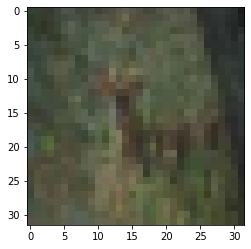

In [11]:
plt.imshow(example)
plt.show()

In [0]:
# Use the vgg_model you loaded to extract the features for the example image
# save the output to example_vgg

# YOUR CODE HERE




example_vgg = vgg_model.predict(example.reshape(1,32,32,3))

In [0]:
assert np.squeeze(example_vgg).shape == (512,)

Now let's create our own fully connected layers and add those after the `vgg_model`. We can then predict train our model on the CIFAR10 dataset and predict its classes. In the following code, you'll want to use Keras' [functional API](https://www.tensorflow.org/guide/keras/functional) that we've used before. 



In [0]:
# Flatten the Convolutional layers' output then
# Add 3 Dense layers with 256 units each followed by the output layer
# Use the functional API to do this
# Save the final output from the layers as `predictions`

x = vgg_model.output
# YOUR CODE HERE


x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

vgg_complete = Model(vgg_model.input, predictions)

In [0]:
assert len(vgg_complete.layers) - len(vgg_model.layers) == 5
assert vgg_complete.layers[-2].units == 256
assert vgg_complete.layers[-3].units == 256
assert vgg_complete.layers[-4].units == 256

In [18]:
vgg_complete.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
# Keep the feature extraction weights as is from the trained ImageNet
# This will reduce the time it takes to train the model
# Try setting the value to True instead and run the next cell to look at the difference in ETA.
for layer in vgg_model.layers:
    layer.trainable=False

In [0]:
# This cell will take a while. Double check your work before continuing
vgg_complete.compile("adam", loss="categorical_crossentropy", metrics=["accuracy"])
vgg_complete.fit(x_train, y_train, epochs=1, batch_size=128)

Train on 50000 samples
45952/50000 [==========================>...] - ETA: 49s - loss: 1.6531 - accuracy: 0.4888

In [0]:
# Report the accuracy on the test set
# Save it as acc

# YOUR CODE HERE
[loss , acc]=vgg_complete.evaluate(x_test, y_test)

In [0]:
assert acc > 0.3

In [0]:
print(f"If you were to guess just one class all the time, your accuracy would be 0.1. Your model accuracy is {acc:.3f}")

## Feedback

In [0]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "This will help with "